In [1]:
%pip install networkx

Note: you may need to restart the kernel to use updated packages.


[[1 1 1 1 1 1]
 [1 0 0 0 0 1]
 [1 1 1 1 0 1]
 [1 1 1 1 0 1]
 [1 0 0 0 0 1]
 [1 1 1 1 1 1]]


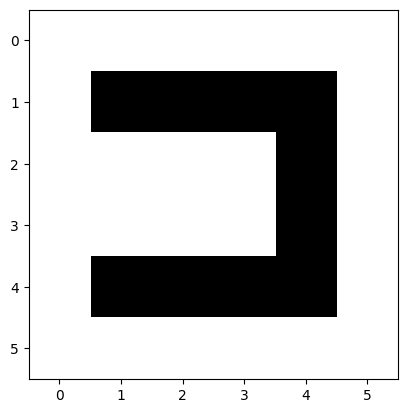

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.seed = 6

def carve_maze(grid, size):
  output_grid = np.ones([size*3, size*3],dtype=int)
  i = 0
  j = 0
  while i < size:
    w = i*3 + 1
    while j < size:
      k = j*3 + 1
      toss = grid[i,j]
      output_grid[w,k] = 0
      if toss == 0 and k+2 < size*3:
        output_grid[w,k+1] = 0
        output_grid[w,k+2] = 0
      if toss == 1 and w-2 >=0:
        output_grid[w-1,k] = 0
        output_grid[w-2,k] = 0
      j = j + 1
    i = i + 1
    j = 0
  return output_grid

# Final test

# Try with small test
n = 1
p = 0.3
size = 2
grid = np.random.binomial(n,p, size=(size,size))

first_row = grid[0]
first_row[first_row == 1] = 0
grid[0] = first_row
for i in range(1,size):
  grid[i,size-1] = 1

maze = carve_maze(grid, size)
print(maze)

# Display the maze

plt.imshow(maze, cmap='gray')

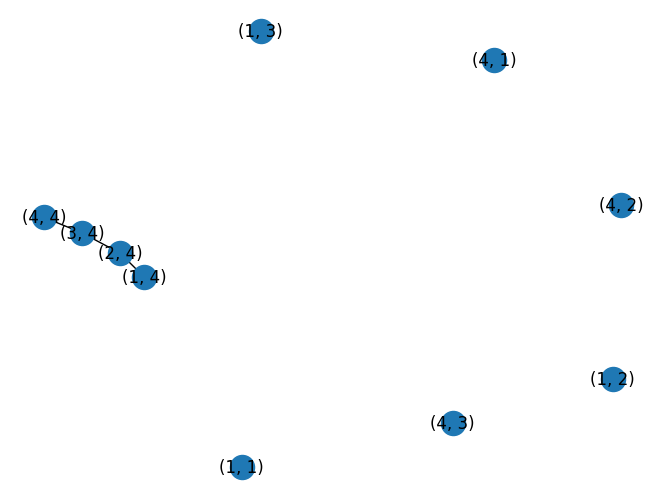

In [2]:
import networkx as nx

# De laberinto a grafo

G = nx.Graph()

N, M = maze.shape

for i in range(N):
  for j in range(M):
    if maze[i,j] == 0:
        G.add_node( (i,j) )

for x in G.nodes():
  i, j = x
  if maze[i+1, j] == 0:
    G.add_edge((i,j), (i+1, j))

pos = nx.spring_layout(G)
node_labels = {node: str(node) for node in G.nodes()}

nx.draw(G, pos, with_labels=True, labels=node_labels)
plt.draw()

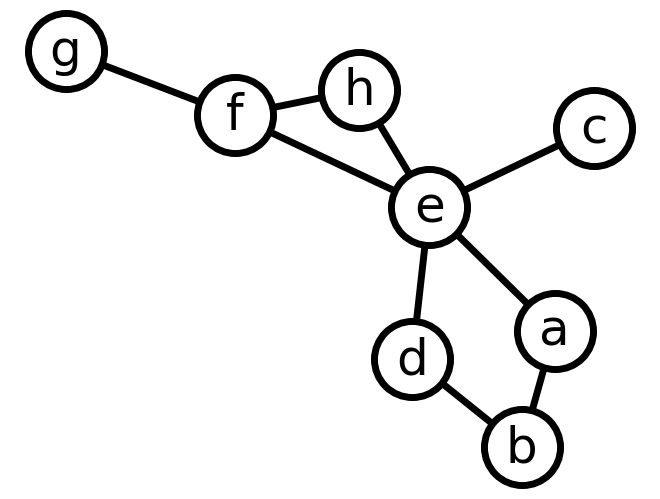

In [ ]:
# Ejemplo de grafo

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_nodes_from(["a","b","c","d","e", "f", "g", "h"])

G.add_edges_from([("a","b"), ("a", "e"), ("b", "d"), ("d", "e"), ("e","c"),
                  ("e", "f"), ("f", "g"), ("f", "h"), ("e", "h")])

options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}

pos = nx.spring_layout(G)
node_labels = {node: str(node) for node in G.nodes()}

nx.draw(G, pos, with_labels=True, labels=node_labels, **options)
plt.draw()

In [ ]:
# Depth First

def depth_first(G, x, visited):
  if x in visited:
    return None
  else:
    print(x)
    visited.add(x)
    for y in G.neighbors(x):
      depth_first(G, y, visited)
    return None

def not_depth_first(G, x):
  # non recursive
  visited = set()
  pendientes = []
  pendientes.append(x)
  while len(pendientes) > 0:
    y = pendientes.pop()
    if not (y in visited):
      # Recuerde invertir el oren de neighbors
      visited.add(y)
      print(y)
      for z in G.neighbors(y):
        pendientes.append(z)

# search node by name
not_depth_first(G, 'a')

a
e
h
f
g
c
d
b


In [ ]:
# Breadth firts

def b_first(G, x):
  # non recursive
  visited = set()
  pendientes = []
  pendientes.append(x)
  while len(pendientes) > 0:
    y = pendientes.pop(0)
    if not (y in visited):
      # Recuerde invertir el oren de neighbors
      visited.add(y)
      print(y)
      for z in G.neighbors(y):
        if not (z in visited):
          pendientes.append(z)

# search node by name
b_first(G, 'a')

a
b
e
d
c
f
h
g


In [ ]:
# Input:
#      Maze binary np.array()
#      Initial point (row, column)
#      Final point (row, column)
# Output:
#      movements sequence
#      List (L, R, R, R, D, D, D, U)

def solve_maze( maze, (1, 1), (4, 1)):
  return ["L", "L", "D"]